# Incidence de la varicelle

In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
import requests

 Les données de l'incidence de la varicelle sont disponibles du site Web du Réseau Sentinelles. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence à la 49ème semaine de l'année 1990 et se termine avec une semaine récente.

In [5]:
data_url="https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [6]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data 

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202248          7   5140     3127    7153       8           5   
1     202247          7   6094     3737    8451       9           5   
2     202246          7   3033     1392    4674       5           3   
3     202245          7   3827     1720    5934       6           3   
4     202244          7   4271     2231    6311       6           3   
5     202243          7   5863     3302    8424       9           5   
6     202242          7   3770     1950    5590       6           3   
7     202241          7   4177     2219    6135       6           3   
8     202240          7   4883     1472    8294       7           2   
9     202239          7   2041      331    3751       3           0   
10    202238          7   1771      419    3123       3           1   
11    202237          7   1725      499    2951       3           1   
12    202236          7   1069      178    1960       2           1   
13    202235          7   1581      400    2762       2           0   
14    202234          7   2266      788    3744       3           1   
15    202233          7   7340        0   17399      11           0   
16    202232          7   7801     4086   11516      12           6   
17    202231          7   6896     4170    9622      10           6   
18    202230          7   9039     5770   12308      14           9   
19    202229          7  14851    10060   19642      22          15   
20    202228          7  15471    11028   19914      23          16   
21    202227          7  21191    16198   26184      32          24   
22    202226          7  16854    12806   20902      25          19   
23    202225          7  22246    18011   26481      34          28   
24    202224          7  22458    18105   26811      34          27   
25    202223          7  18772    14875   22669      28          22   
26    202222          7  18916    14941   22891      29          23   
27    202221          7  20310    16307   24313      31          25   
28    202220          7  23585    19004   28166      36          29   
29    202219          7  18593    14181   23005      28          21   
...      ...        ...    ...      ...     ...     ...         ...   
1640  199126          7  17608    11304   23912      31          20   
1641  199125          7  16169    10700   21638      28          18   
1642  199124          7  16171    10071   22271      28          17   
1643  199123          7  11947     7671   16223      21          13   
1644  199122          7  15452     9953   20951      27          17   
1645  199121          7  14903     8975   20831      26          16   
1646  199120          7  19053    12742   25364      34          23   
1647  199119          7  16739    11246   22232      29          19   
1648  199118          7  21385    13882   28888      38          25   
1649  199117          7  13462     8877   18047      24          16   
1650  199116          7  14857    10068   19646      26          18   
1651  199115          7  13975     9781   18169      25          18   
1652  199114          7  12265     7684   16846      22          14   
1653  199113          7   9567     6041   13093      17          11   
1654  199112          7  10864     7331   14397      19          13   
1655  199111          7  15574    11184   19964      27          19   
1656  199110          7  16643    11372   21914      29          20   
1657  199109          7  13741     8780   18702      24          15   
1658  199108          7  13289     8813   17765      23          15   
1659  199107          7  12337     8077   16597      22          15   
1660  199106          7  10877     7013   14741      19          12   
1661  199105          7  10442     6544   14340      18          11   
1662  199104          7   7913     4563   11263      14           8   
1663  199103          7  15387    10484   20290      27          18   
1664  199102          7  16277  

Il n'y a pas de données manquantes dans ce jeux de données.

In [9]:
raw_data[raw_data.isnull().any(axis=1)] 

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous réalisons toutefois une opération le fichier de toute donnée manquante si le cas se présentait dans l'avenir. Nous travaillerons donc sur le jeu de données nommé `data`.

In [11]:
 data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202248          7   5140     3127    7153       8           5   
1     202247          7   6094     3737    8451       9           5   
2     202246          7   3033     1392    4674       5           3   
3     202245          7   3827     1720    5934       6           3   
4     202244          7   4271     2231    6311       6           3   
5     202243          7   5863     3302    8424       9           5   
6     202242          7   3770     1950    5590       6           3   
7     202241          7   4177     2219    6135       6           3   
8     202240          7   4883     1472    8294       7           2   
9     202239          7   2041      331    3751       3           0   
10    202238          7   1771      419    3123       3           1   
11    202237          7   1725      499    2951       3           1   
12    202236          7   1069      178    1960       2           1   
13    202235          7   1581      400    2762       2           0   
14    202234          7   2266      788    3744       3           1   
15    202233          7   7340        0   17399      11           0   
16    202232          7   7801     4086   11516      12           6   
17    202231          7   6896     4170    9622      10           6   
18    202230          7   9039     5770   12308      14           9   
19    202229          7  14851    10060   19642      22          15   
20    202228          7  15471    11028   19914      23          16   
21    202227          7  21191    16198   26184      32          24   
22    202226          7  16854    12806   20902      25          19   
23    202225          7  22246    18011   26481      34          28   
24    202224          7  22458    18105   26811      34          27   
25    202223          7  18772    14875   22669      28          22   
26    202222          7  18916    14941   22891      29          23   
27    202221          7  20310    16307   24313      31          25   
28    202220          7  23585    19004   28166      36          29   
29    202219          7  18593    14181   23005      28          21   
...      ...        ...    ...      ...     ...     ...         ...   
1640  199126          7  17608    11304   23912      31          20   
1641  199125          7  16169    10700   21638      28          18   
1642  199124          7  16171    10071   22271      28          17   
1643  199123          7  11947     7671   16223      21          13   
1644  199122          7  15452     9953   20951      27          17   
1645  199121          7  14903     8975   20831      26          16   
1646  199120          7  19053    12742   25364      34          23   
1647  199119          7  16739    11246   22232      29          19   
1648  199118          7  21385    13882   28888      38          25   
1649  199117          7  13462     8877   18047      24          16   
1650  199116          7  14857    10068   19646      26          18   
1651  199115          7  13975     9781   18169      25          18   
1652  199114          7  12265     7684   16846      22          14   
1653  199113          7   9567     6041   13093      17          11   
1654  199112          7  10864     7331   14397      19          13   
1655  199111          7  15574    11184   19964      27          19   
1656  199110          7  16643    11372   21914      29          20   
1657  199109          7  13741     8780   18702      24          15   
1658  199108          7  13289     8813   17765      23          15   
1659  199107          7  12337     8077   16597      22          15   
1660  199106          7  10877     7013   14741      19          12   
1661  199105          7  10442     6544   14340      18          11   
1662  199104          7   7913     4563   11263      14           8   
1663  199103          7  15387    10484   20290      27          18   
1664  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
Un deuxième problème est que Pandas ne comprend pas les numéros de semaine.  Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque soweek.Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [12]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [13]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.
Nous de détectons aucune erreur.

In [14]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

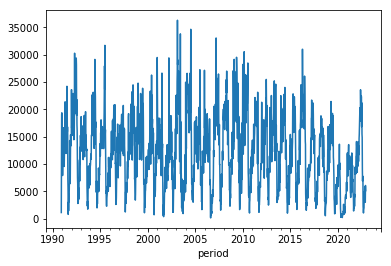

In [15]:
sorted_data['inc'].plot() 

Un zoom sur les dernières années montrent que les pics épidémiques se situent en hiver. Notons toutefois une différence entre le schéma habituel et celui rencontré en 2020, 2021 et 2022. On peut faire l'hypothèse d'une influence du COVID et des mesures mises en place pour contrecarrer cette pandémie sur l'épidémie de varicelle.

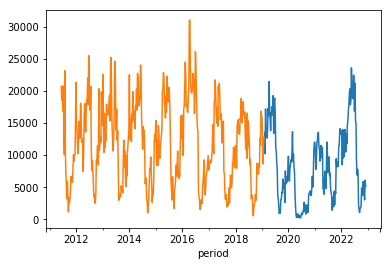

In [26]:
sorted_data['inc'][-200:].plot()
sorted_data['inc'][-600:-200].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année $N$ au 1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de syndrome grippal est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [29]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [30]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

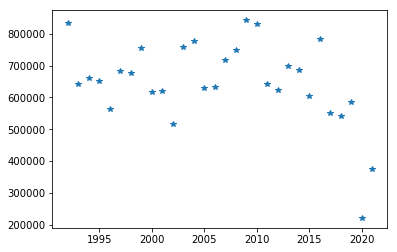

In [31]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [32]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

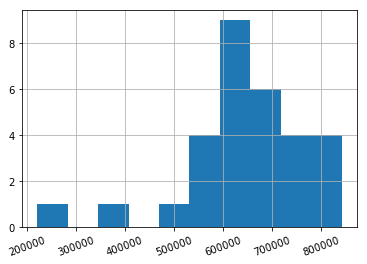

In [33]:
yearly_incidence.hist(xrot=20)